## Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d 


## import data

In [2]:
df_SNP = pd.read_csv ("matrix_1kg.txt",sep='\t')
df_SNP

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# add a column for allele frequency
allele_freq=df_SNP.iloc[:,4:].sum(axis=1)/(2*len(df_SNP.iloc[1,4:]))
allele_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

In [4]:
#extract SNP with allele frequency between 0.05 and 0.95
roi_df=df_SNP[(allele_freq <=0.95)& (allele_freq>=0.05)]
roi_df
# Be careful to use the () before and after&

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,chr21,26683267,T,G,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,1,2,0,0,0,1,1,1,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,chr21,40748951,T,C,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,2
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
9975,chr21,43359202,C,T,2,1,0,1,0,1,...,1,2,2,2,2,1,2,2,2,2


## PCA based on common variation

In [5]:
pca_input=roi_df.iloc[:,4:]
pca_input



# pca_input_standardized = StandardScaler().fit_transform(pca_input)


,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


In [6]:
#transpose the database
pca_input = pca_input.T
pca_input

,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


In [7]:
#do the standard scaling
pca_input_standardized = StandardScaler().fit_transform(pca_input)
#check the mean
pca_input_standardized.mean(axis = 0)

array([-1.56424673e-16, -6.55327876e-16,  1.11871963e-16,  4.68707578e-16,
        8.27438589e-17, -1.18865322e-16,  5.70536118e-16,  1.65749152e-16,
        2.45835098e-16,  2.91847481e-16, -6.09446211e-16, -1.71966924e-15,
        1.30866777e-15, -5.22606552e-16, -1.47396485e-15,  7.63822984e-16,
        2.23051126e-15, -1.98210539e-16,  1.09048476e-15,  5.13979231e-16,
        1.90010226e-15,  3.07794955e-16,  1.41814870e-15,  2.18210240e-16,
        1.21828241e-16, -2.11726677e-15,  1.54158911e-16, -3.32805473e-16,
       -1.36189682e-15, -3.84264398e-16,  1.92110413e-16,  2.84091606e-16,
       -3.47184343e-16,  2.08206032e-15, -4.99861795e-16, -1.89713934e-15,
       -1.42045803e-16, -8.29878639e-16,  2.96379004e-16,  3.13546503e-16,
       -5.90753680e-16, -2.23621923e-15, -6.62038016e-16, -1.99674570e-15,
       -2.44266494e-16, -1.29531829e-15, -5.92017278e-16,  1.59069513e-15,
       -3.25398177e-16, -9.36957646e-16, -7.13496940e-16,  3.40866355e-16,
        1.77016957e-15,  

In [8]:
# check the variance
pca_input_standardized.var(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [9]:
# do pca
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[-6.14493037, -9.81856684, -1.5460695 , ..., -1.03927101,
         0.36521254, -5.12963074],
       [-6.13388414, -8.63182886,  2.55682028, ..., -3.94877435,
        -1.74787232,  0.70927366],
       [-6.23847319, -7.97187015, -0.7457094 , ...,  1.43072089,
         0.69737936,  0.04151462],
       ...,
       [-4.09694721, -2.82736154, -4.18012631, ..., -0.06757763,
         1.35273158,  4.41225008],
       [-6.26346243, -2.58507959, -4.22619086, ...,  3.28294107,
        -0.77560402,  2.32265652],
       [-3.17677867, -0.91694959, -6.4512018 , ..., -2.91276483,
         0.14943024,  1.94393946]])

In [10]:
#check if the data points number is correct
pca_output.shape

(2548, 10)

In [11]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.144930,-9.818567,-1.546070,-5.398534,-0.546199,0.053836,1.642239,-1.039271,0.365213,-5.129631
1,-6.133884,-8.631829,2.556820,-3.891386,0.355185,-2.466256,2.143265,-3.948774,-1.747872,0.709274
2,-6.238473,-7.971870,-0.745709,-4.015884,-0.945312,4.057081,-1.565468,1.430721,0.697379,0.041515
3,-5.051218,-7.008727,2.805108,-4.762708,4.360608,0.352697,-1.851880,0.450849,2.017958,-0.419027
4,-6.634383,-8.543670,3.072001,-1.593957,-4.353657,0.883262,0.385866,5.056439,-0.707389,0.744527
...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665309,3.301133,-0.172536,-0.696970,-2.772773,0.090790,-1.618790,-1.698105
2544,-6.295888,-3.116492,-5.555270,3.333874,3.322089,3.557470,-1.965170,2.171993,-2.869925,-0.757784
2545,-4.096947,-2.827362,-4.180126,3.694621,1.540780,0.335134,-1.654811,-0.067578,1.352732,4.412250
2546,-6.263462,-2.585080,-4.226191,3.895799,-3.886864,-1.916754,-0.847601,3.282941,-0.775604,2.322657


### 3D Plot

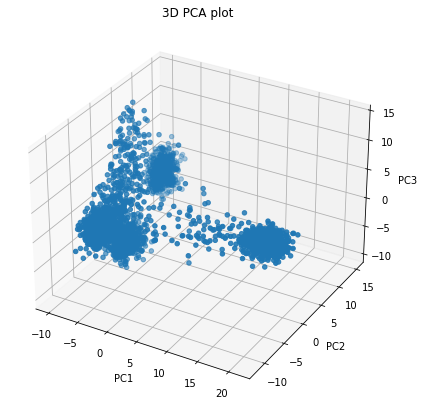

In [12]:
fig, ax = plt.subplots(figsize = (10, 7))
ax = plt.axes(projection ="3d") 
ax.scatter3D(pca_output_df['PC1'], pca_output_df['PC2'], pca_output_df['PC3'])
plt.title('3D PCA plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


### 3D plot by population

In [13]:
df_metadata = pd.read_csv("integrated_call_samples_v3.20130502.ALL.panel", sep = "\t")
pca_output_df['sample'] = pca_input.index
df_metadata=df_metadata.iloc[:,:-2]
pca_output_df = pd.merge(pca_output_df, df_metadata, on = "sample")


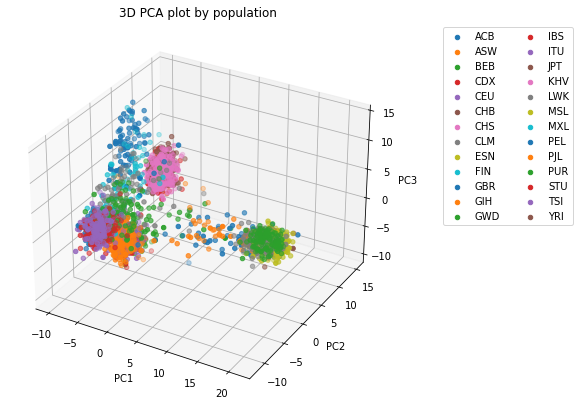

In [21]:
tissues = pca_output_df.groupby("pop")
fig, ax = plt.subplots(figsize = (10,7))
ax = plt.axes(projection ="3d") 
for name, group in tissues:
    ax.scatter3D(group['PC1'], group['PC2'], group['PC3'], label = name)
plt.title('3D PCA plot by population')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(bbox_to_anchor = (1.5, 1), loc = 'upper right', ncol = 2)

plt.show()

### 3D plotting by super population

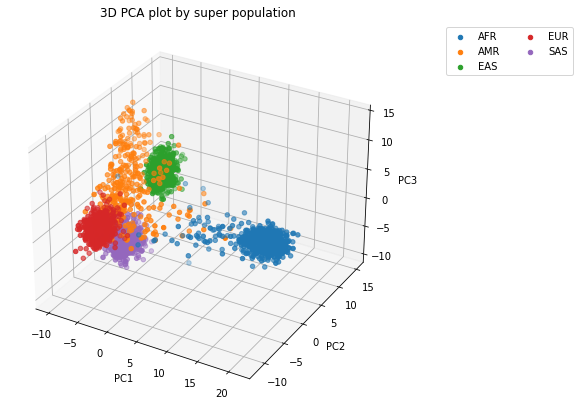

In [22]:
fig, ax = plt.subplots(figsize = (10,7))
ax = plt.axes(projection ="3d") 
tissues = pca_output_df.groupby("super_pop")

for name, group in tissues:
    ax.scatter3D(group['PC1'], group['PC2'], group['PC3'], label = name)
plt.title('3D PCA plot by super population')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(bbox_to_anchor = (1.5, 1), loc = 'upper right', ncol = 2)

plt.show()

### 3D plot by gender

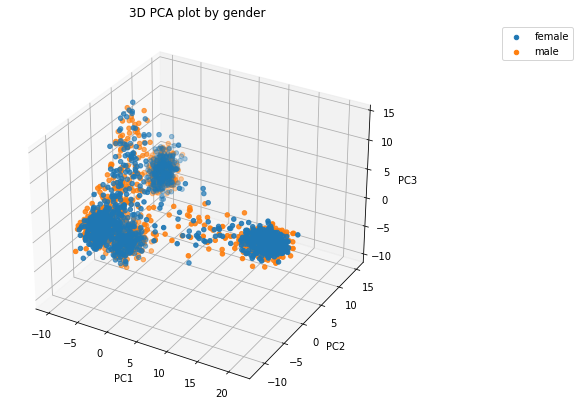

In [24]:
fig, ax = plt.subplots(figsize = (10,7))
ax = plt.axes(projection ="3d") 
tissues = pca_output_df.groupby("gender")

for name, group in tissues:
    ax.scatter3D(group['PC1'], group['PC2'], group['PC3'], label = name)
plt.title('3D PCA plot by gender')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(bbox_to_anchor = (1.5, 1), loc = 'upper right', ncol = 1)

plt.show()